In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("intents_data.csv")
df.head(5)

Text      Intent
0  hello  small_talk
1     hi  small_talk
2    hey  small_talk
3     yo  small_talk
4   heya  small_talk

In [3]:
df.Intent.value_counts()

Intent
small_talk    1000
quit          1000
thanks        1000
help          1000
predict       1000
get           1000
set           1000
calculate     1000
definition    1000
Name: count, dtype: int64

In [4]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [5]:
intent = df.Intent.map({
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
})

intent

0       0
1       0
2       0
3       0
4       0
       ..
8995    7
8996    7
8997    7
8998    7
8999    7
Name: Intent, Length: 9000, dtype: int64

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [7]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [8]:
text = df.Text.apply(preprocess)

In [9]:
text

0                                          hello
1                                             hi
2                                            hey
3                                             yo
4                                           heya
                          ...                   
8995           what be another word for ' word '
8996      be there a technical term for ' word '
8997    let I see ' word ' define in simple term
8998            could you clarify ' word ' for I
8999                       what do ' word ' mean
Name: Text, Length: 9000, dtype: object

In [10]:
text.iloc[3974]

'/'

In [11]:
df1 = pd.concat([text, intent], axis="columns")

In [12]:
df1.iloc[1456:1486]

Text  Intent
1456   I be very grateful to you for help I       1
1457                thank you for your help       1
1458  once again thank you for your support       1
1459                   thank you for listen       1
1460                                  thank       1
1461                              thank you       1
1462                          appreciate it       1
1463                        you be the good       1
1464                          thank a bunch       1
1465               I really appreciate that       1
1466     I could not have do it without you       1
1467                     you be a lifesaver       1
1468               that be very kind of you       1
1469                            much oblige       1
1470                       thank in advance       1
1471                               you rock       1
1472                                perfect       1
1473                        you make my day       1
1474                  that be awesome thank       1
1475                          you be a star       1
1476                             Mega thank       1
1477                          I owe you one       1
1478                                awesome       1
1479                         you be awesome       1
1480                      you be incredible       1
1481                      that be fantastic       1
1482                         you be kill it       1
1483                      you be a rockstar       1
1484                         you be on fire       1
1485                       you be brilliant       1

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
v = CountVectorizer(ngram_range=(1, 2))

x = v.fit_transform(df1.Text.values).toarray()

In [15]:
y = df1.Intent

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9744444444444444
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       200
           1       0.97      0.97      0.97       200
           2       1.00      0.99      1.00       200
           3       0.99      1.00      1.00       200
           4       1.00      0.98      0.99       200
           5       1.00      1.00      1.00       200
           6       1.00      0.86      0.92       200
           7       1.00      1.00      1.00       200
           8       0.98      0.96      0.97       200

    accuracy                           0.97      1800
   macro avg       0.98      0.97      0.97      1800
weighted avg       0.98      0.97      0.97      1800



In [18]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "what is the forecast of operating result of year 2020"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[3]
[[6.84939373e-13 2.13072862e-13 2.24663776e-18 9.99999837e-01
  3.37804479e-08 9.05400813e-21 4.52024030e-08 8.37821725e-08
  7.24868678e-17]]


In [19]:
import joblib

# Save the model
joblib.dump(model, "intent_classification_model")

['intent_classification_model']

Text(45.722222222222214, 0.5, 'Truth')

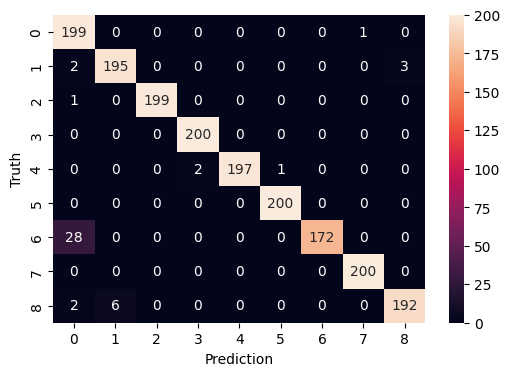

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [22]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9788888888888889
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       200
           1       1.00      0.98      0.99       200
           2       0.99      0.96      0.98       200
           3       0.98      1.00      0.99       200
           4       1.00      0.89      0.94       200
           5       1.00      1.00      1.00       200
           6       0.94      1.00      0.97       200
           7       0.97      1.00      0.99       200
           8       0.98      0.97      0.98       200

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [ ]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "what is the forecast of operating result"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[3]
[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
from  sklearn.svm import SVC

model = SVC(probability=True)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9955555555555555
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       1.00      0.99      0.99       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      0.99      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       0.99      0.98      0.98       200

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [ ]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "45 * 89"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(preprocess(phrases))
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

45 * 89
[6]
[[3.28559068e-03 2.49455911e-03 5.57998468e-04 2.27585562e-04
  4.36560593e-04 3.04395066e-04 9.86246941e-01 2.72309488e-04
  6.17405956e-03]]


In [ ]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.995
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.99      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       0.99      0.99      0.99       200
           4       0.99      0.99      0.99       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      0.97      0.98       200

    accuracy                           0.99      1800
   macro avg       1.00      0.99      0.99      1800
weighted avg       1.00      0.99      0.99      1800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.995
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.99      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       0.99      0.99      0.99       200
           4       0.99      0.99      0.99       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      0.97      0.98       200

    accuracy                           0.99      1800
   macro avg       1.00      0.99      0.99      1800
weighted avg       1.00      0.99      0.99      1800



In [ ]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "what is the definition"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[7]
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

## Deep Learning